In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('./dataset_minute.csv')

**Since we are using nifty50 and as there is no volume of the index funds we have to make the following indicators**
**We will use "*ta*" library for that to easily calculate all the indicators**


**These are the following indicators:**
    
    SMA_50, SMA_200

    EMA_12, EMA_26

    MACD, MACD_Signal, MACD_Diff

    RSI

    Momentum

    BB_Upper, BB_Lower, BB_Middle

    ATR

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


**Importing "ta" to calculate all the required indicators**

In [8]:
!pip install ta
import ta


df['SMA_50'] = ta.trend.sma_indicator(close=df['Close'], window=50)
df['SMA_200'] = ta.trend.sma_indicator(close=df['Close'], window=200)

df['EMA_12'] = ta.trend.ema_indicator(close=df['Close'], window=12)
df['EMA_26'] = ta.trend.ema_indicator(close=df['Close'], window=26)

macd = ta.trend.MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()
df['MACD_Diff'] = macd.macd_diff()


df['RSI'] = ta.momentum.rsi(close=df['Close'], window=14)
df['Momentum'] = ta.momentum.AwesomeOscillatorIndicator(high=df['High'], low=df['Low']).awesome_oscillator()  # Awesome Oscillator


bb = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)
df['BB_Middle'] = bb.bollinger_mavg()
df['BB_Upper'] = bb.bollinger_hband()
df['BB_Lower'] = bb.bollinger_lband()

df['ATR'] = ta.volatility.average_true_range(high=df['High'], low=df['Low'], close=df['Close'], window=14)



  Using cached ta-0.11.0.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29482 sha256=17606f1b563a4c753fdaaea5aa7a174541b3b503f24c062094244b8b9ee1c8b6
  Stored in directory: /home/stark/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


**Removing first 200 datapoints as SMA 200 will contain null on all , also we have a huge dataset without null so it is safe to remove**

In [9]:
df=df.iloc[199:]

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200',
       'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI',
       'Momentum', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'ATR'],
      dtype='object')

In [11]:
#df = df.iloc[:-930000]


**We wil perform some EDA on this**

In [12]:
df.describe()

,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR
count,932747.000000,932747.000000,932747.000000,932747.000000,932747.0,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000
mean,13624.918096,13627.721692,13622.082066,13624.894716,0.0,13624.492147,13623.266223,13624.804190,13624.689187,0.115004,0.114917,0.000086,50.621060,0.238568,13624.738334,13640.540643,13608.936026,5.803585
std,5047.752031,5048.665025,5046.811851,5047.763651,0.0,5047.546026,5046.881544,5047.709659,5047.642419,7.641704,7.207737,2.270389,12.301238,19.326081,5047.678476,5052.112178,5043.310447,3.877612
min,6846.800000,6860.900000,6826.350000,6848.100000,0.0,6907.067000,6936.944500,6885.941111,6895.100785,-261.813155,-231.430459,-100.929147,0.975063,-707.841765,6892.995000,6915.955028,6842.693025,0.027717
25%,9431.400000,9433.550000,9429.425000,9431.375000,0.0,9432.066500,9424.440125,9431.176261,9431.205655,-2.372978,-2.255415,-0.795845,42.429764,-6.012206,9430.872500,9441.840698,9416.288419,3.217141
50%,11562.150000,11564.400000,11559.800000,11562.100000,0.0,11561.407000,11557.790750,11561.846367,11561.724716,0.228782,0.220316,-0.014016,50.798590,0.488088,11561.937500,11573.643008,11550.589824,4.851681
75%,17607.650000,17610.950000,17603.900000,17607.550000,0.0,17606.529500,17607.346250,17607.172162,17607.017561,2.742522,2.609150,0.759058,58.891558,6.779044,17607.143750,17628.941977,17586.675911,7.191176
max,26273.400000,26277.350000,26270.600000,26273.450000,0.0,26265.051000,26242.757750,26268.261191,26266.569728,181.208783,169.546054,75.572611,99.862802,541.358235,26267.395000,26283.346895,26261.433798,83.241696


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932747 entries, 199 to 932945
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         932747 non-null  object 
 1   Open         932747 non-null  float64
 2   High         932747 non-null  float64
 3   Low          932747 non-null  float64
 4   Close        932747 non-null  float64
 5   Volume       932747 non-null  int64  
 6   SMA_50       932747 non-null  float64
 7   SMA_200      932747 non-null  float64
 8   EMA_12       932747 non-null  float64
 9   EMA_26       932747 non-null  float64
 10  MACD         932747 non-null  float64
 11  MACD_Signal  932747 non-null  float64
 12  MACD_Diff    932747 non-null  float64
 13  RSI          932747 non-null  float64
 14  Momentum     932747 non-null  float64
 15  BB_Middle    932747 non-null  float64
 16  BB_Upper     932747 non-null  float64
 17  BB_Lower     932747 non-null  float64
 18  ATR          932747 no

In [14]:
df.isnull().sum()


Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
SMA_50         0
SMA_200        0
EMA_12         0
EMA_26         0
MACD           0
MACD_Signal    0
MACD_Diff      0
RSI            0
Momentum       0
BB_Middle      0
BB_Upper       0
BB_Lower       0
ATR            0
dtype: int64

**We can clearly see there is no null**
**So no need to handle any null value**

**Now we will plot some graph, so basic understand what we can grasp from them**


fig,axs=plt.subplots(2,3,figsize=(28,20))
axs[0,0].plot(df['Date'], df['SMA_50'])
axs[0,0].set_ylabel('SMA')
axs[0,1].plot(df['Date'], df['EMA_12'])
axs[0,1].set_ylabel('EMA')
axs[0,2].plot(df['Date'], df['Momentum'])
axs[0,2].set_ylabel('Momentum')
axs[1,0].plot(df['Date'], df['MACD'])
axs[1,0].set_ylabel('MACD')
axs[1,1].plot(df['Date'], df['RSI'])
axs[1,1].set_ylabel('RSI')
axs[1,2].plot(df['Date'], df['ATR'])
axs[1,2].set_ylabel('ATR')



**From here we can roughly see that SMA&EMA are kindoff co-linear, and MACD&Momentum too**

**Also on sudden huge increase of MAC/ATR/Momentum we can visualise that the SMA & EMA have dropped**

**We will check corelation of the data using corr, but for that we would have to remove the date and volume column**

In [15]:
af=df.drop(["Date","Volume"],axis=1)

In [17]:
!pip install seaborn
import seaborn as sns

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [18]:
corr=af.corr()

In [19]:
corr

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR
Open,1.000000,1.000000,1.000000,0.999999,0.999986,0.999940,0.999998,0.999995,0.010782,0.011465,-0.000107,0.010180,0.008873,0.999995,0.999988,0.999989,0.484291
High,1.000000,1.000000,1.000000,1.000000,0.999986,0.999941,0.999998,0.999995,0.010774,0.011436,-0.000041,0.010307,0.008855,0.999995,0.999988,0.999988,0.484576
Low,1.000000,1.000000,1.000000,1.000000,0.999986,0.999939,0.999998,0.999995,0.010866,0.011521,-0.000002,0.010380,0.008937,0.999995,0.999987,0.999990,0.483996
Close,0.999999,1.000000,1.000000,1.000000,0.999986,0.999940,0.999998,0.999995,0.010840,0.011479,0.000046,0.010473,0.008898,0.999995,0.999987,0.999989,0.484288
SMA_50,0.999986,0.999986,0.999986,0.999986,1.000000,0.999966,0.999992,0.999997,0.005680,0.006661,-0.002026,0.006574,0.003972,0.999995,0.999989,0.999987,0.484740
SMA_200,0.999940,0.999941,0.999939,0.999940,0.999966,1.000000,0.999947,0.999956,0.003292,0.003658,-0.000534,0.005082,0.002514,0.999951,0.999949,0.999940,0.485953
EMA_12,0.999998,0.999998,0.999998,0.999998,0.999992,0.999947,1.000000,0.999999,0.009556,0.010636,-0.001602,0.009000,0.007572,0.999999,0.999992,0.999993,0.484366
EMA_26,0.999995,0.999995,0.999995,0.999995,0.999997,0.999956,0.999999,1.000000,0.008042,0.009190,-0.002108,0.007979,0.006099,1.000000,0.999993,0.999993,0.484500
MACD,0.010782,0.010774,0.010866,0.010840,0.005680,0.003292,0.009556,0.008042,1.000000,0.954917,0.334267,0.674740,0.973004,0.008387,0.008033,0.008742,-0.084427
MACD_Signal,0.011465,0.011436,0.011521,0.011479,0.006661,0.003658,0.010636,0.009190,0.954917,1.000000,0.039400,0.567364,0.884779,0.009735,0.009374,0.010097,-0.092424


**Correlation**

<Axes: >

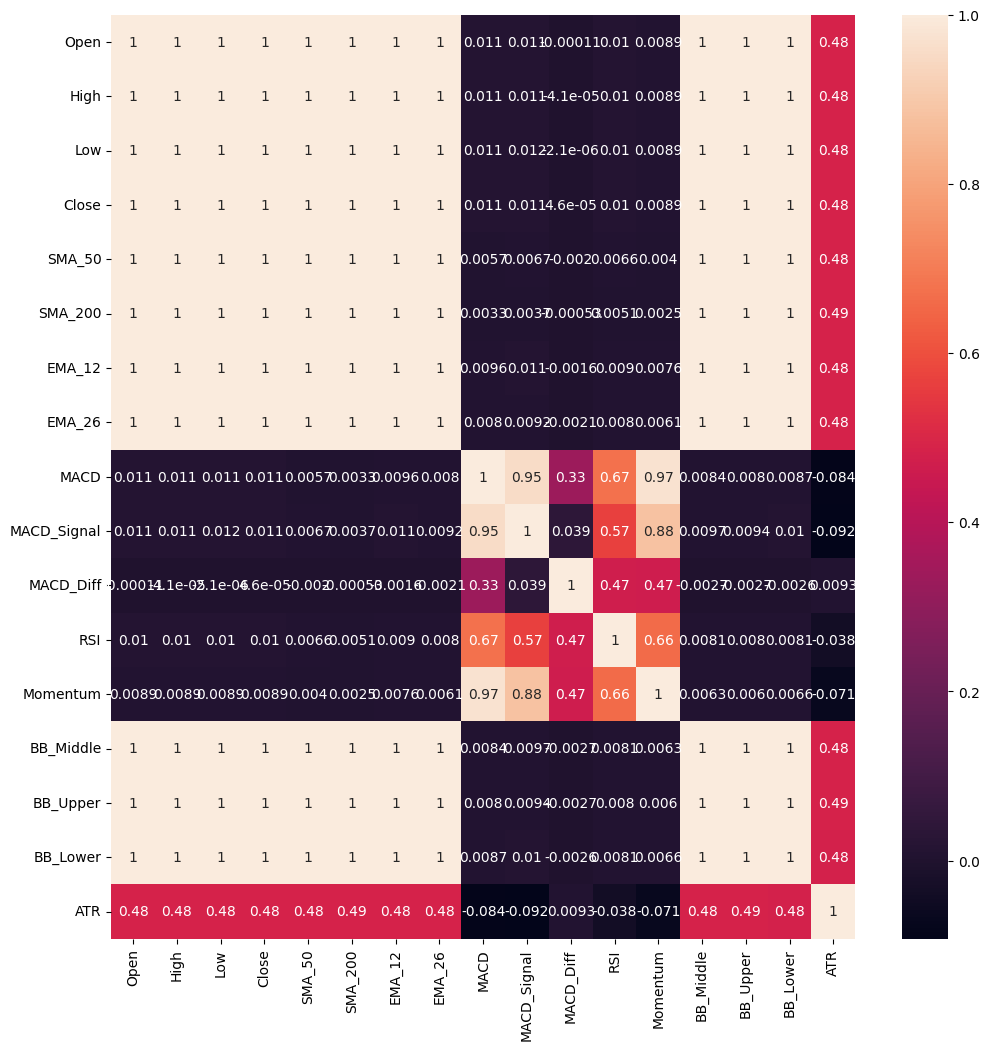

In [20]:
corr=af.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

**As expected we can see that SMA&EMA are highly corellated**
**MACD,MACD_Signal are correllted too**
**All BB is same too**
**So for linear regression we would have to remove some column for better prediction, so we will proceed with**
    
    SMA_50

    MACD_Signal

    RSI

    ATR
    

In [21]:
af.columns

Index(['Open', 'High', 'Low', 'Close', 'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26',
       'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI', 'Momentum', 'BB_Middle',
       'BB_Upper', 'BB_Lower', 'ATR'],
      dtype='object')

In [22]:
#linear_df=af.drop(['SMA_50','MACD_Signal','RSI','BB_Upper','ATR'],axis=1)
lineardf=af.drop(['Open', 'High', 'Low', 'SMA_200', 'EMA_12', 'EMA_26','MACD', 'MACD_Diff', 'Momentum', 'BB_Middle', 'BB_Lower','BB_Upper'],axis=1)


In [23]:
lineardf

,Close,SMA_50,MACD_Signal,RSI,ATR
199,8209.25,8231.955,-5.064565,38.064747,8.178270
200,8209.20,8230.956,-5.054368,38.024265,8.104822
201,8210.30,8229.988,-5.034842,39.547491,8.015192
202,8209.10,8228.994,-5.018163,38.437620,7.964107
203,8202.90,8227.870,-5.091621,33.246152,7.977385
...,...,...,...,...,...
932941,23568.10,23517.748,18.831749,60.198889,9.299272
932942,23567.40,23519.506,17.846242,59.659717,8.988609
932943,23576.50,23521.403,16.981542,64.154438,9.271566
932944,23568.10,23523.186,16.065169,57.757200,9.405740


<Axes: >

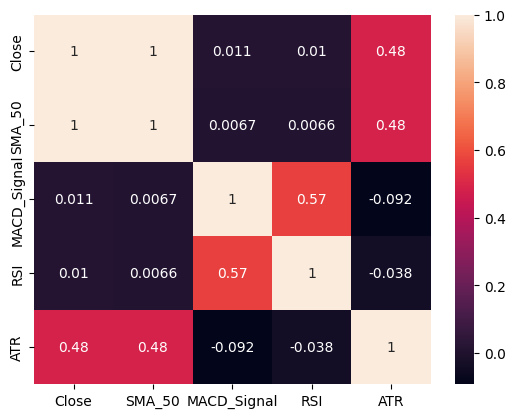

In [24]:
corr1=lineardf.corr()
sns.heatmap(corr1,annot=True)

**Now the correlation is significantly lower,and for linear regression it will work well**

**Let's apply Linear Regression**

In [25]:
lineardf['Close_1min']=lineardf['Close'].shift(-1)

In [26]:
lineardf=lineardf.iloc[:-1]

In [27]:
lineardf.loc[:, 'Direction_1min'] = (lineardf['Close_1min'] > lineardf['Close']).astype(int)


/tmp/ipykernel_560172/2496737026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf.loc[:, 'Direction_1min'] = (lineardf['Close_1min'] > lineardf['Close']).astype(int)


In [28]:
lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']
print(lineardf['delta'].describe())

count    932746.000000
mean          0.016461
std           6.688297
min        -756.150000
25%          -2.100000
50%           0.000000
75%           2.100000
max         559.100000
Name: delta, dtype: float64


/tmp/ipykernel_560172/3548087924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']


<Axes: >

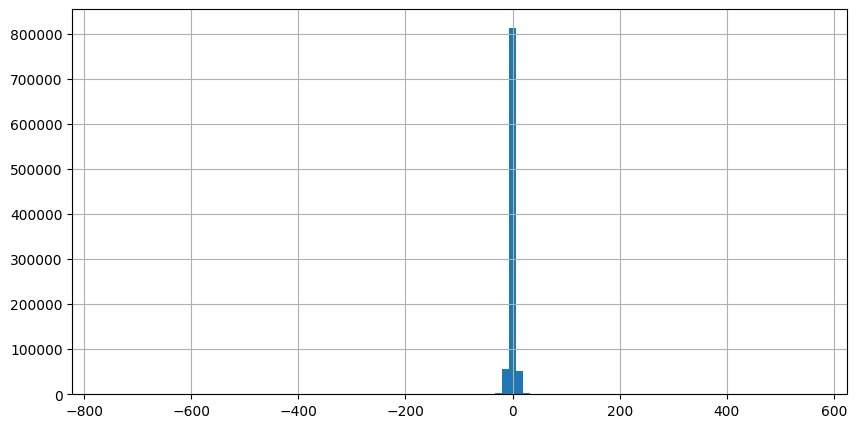

In [29]:
lineardf['delta'].hist(bins=100, figsize=(10, 5))


In [30]:
lineardf['delta'].abs().sort_values(ascending=False).head(10)


479782    756.15
477532    741.20
479032    593.65
868010    559.10
868385    550.05
477598    532.30
477907    526.40
168412    507.75
477157    505.15
912320    415.20
Name: delta, dtype: float64

In [31]:
lineardf['delta'].describe(percentiles=[0.95, 0.99, 0.999])


count    932746.000000
mean          0.016461
std           6.688297
min        -756.150000
50%           0.000000
95%           7.400000
99%          14.950000
99.9%        43.762750
max         559.100000
Name: delta, dtype: float64

In [32]:
lineardf['Close_1min'] = np.where(
    lineardf['Close_1min'] > lineardf['Close'] + 15,
    lineardf['Close'] + 15,
    np.where(
        lineardf['Close_1min'] < lineardf['Close'] - 15,
        lineardf['Close'] - 15,
        lineardf['Close_1min']
    )
)

/tmp/ipykernel_560172/3677038186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf['Close_1min'] = np.where(


In [33]:
lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']
print(lineardf['delta'].describe())

count    932746.000000
mean          0.003226
std           4.538304
min         -15.000000
25%          -2.100000
50%           0.000000
75%           2.100000
max          15.000000
Name: delta, dtype: float64


/tmp/ipykernel_560172/3548087924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']


In [34]:
lineardf=lineardf.drop(['Close','delta'],axis=1)

In [35]:
lineardf

,SMA_50,MACD_Signal,RSI,ATR,Close_1min,Direction_1min
199,8231.955,-5.064565,38.064747,8.178270,8209.20,0
200,8230.956,-5.054368,38.024265,8.104822,8210.30,1
201,8229.988,-5.034842,39.547491,8.015192,8209.10,0
202,8228.994,-5.018163,38.437620,7.964107,8202.90,0
203,8227.870,-5.091621,33.246152,7.977385,8204.75,1
...,...,...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677,23568.10,0
932941,23517.748,18.831749,60.198889,9.299272,23567.40,0
932942,23519.506,17.846242,59.659717,8.988609,23576.50,1
932943,23521.403,16.981542,64.154438,9.271566,23568.10,0


In [36]:
lineardf.columns

Index(['SMA_50', 'MACD_Signal', 'RSI', 'ATR', 'Close_1min', 'Direction_1min'], dtype='object')

In [37]:
X=lineardf.drop(["Close_1min","Direction_1min"],axis=1)


In [38]:
Y_reg=lineardf['Close_1min']


In [39]:
Y_class=lineardf['Direction_1min']

In [40]:
X

,SMA_50,MACD_Signal,RSI,ATR
199,8231.955,-5.064565,38.064747,8.178270
200,8230.956,-5.054368,38.024265,8.104822
201,8229.988,-5.034842,39.547491,8.015192
202,8228.994,-5.018163,38.437620,7.964107
203,8227.870,-5.091621,33.246152,7.977385
...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677
932941,23517.748,18.831749,60.198889,9.299272
932942,23519.506,17.846242,59.659717,8.988609
932943,23521.403,16.981542,64.154438,9.271566


In [41]:
Y_reg

199        8209.20
200        8210.30
201        8209.10
202        8202.90
203        8204.75
            ...   
932940    23568.10
932941    23567.40
932942    23576.50
932943    23568.10
932944    23563.15
Name: Close_1min, Length: 932746, dtype: float64

In [42]:
Y_class

199       0
200       1
201       0
202       0
203       1
         ..
932940    0
932941    0
932942    1
932943    0
932944    0
Name: Direction_1min, Length: 932746, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_reg,test_size=0.33)

In [46]:
X_train

,SMA_50,MACD_Signal,RSI,ATR
120171,7847.531,0.806222,47.491598,2.225172
147018,8635.285,8.724660,61.252265,4.151234
738905,18028.685,-6.803196,37.262232,5.113826
130316,8223.555,-1.783405,34.649428,2.462954
84709,7660.936,1.818533,65.245111,2.377719
...,...,...,...,...
850565,21895.575,-3.339419,40.355167,10.095752
707633,17682.471,-8.057030,29.488917,8.488798
613959,17101.071,-4.858460,39.834713,5.992931
679853,15983.352,44.994094,68.219004,11.741163


In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
linear=LinearRegression()

In [50]:
linear.fit(X_train,Y_train)

LinearRegression()

In [51]:
Y_predict=linear.predict(X_test)

In [52]:
from sklearn.metrics import r2_score
print(r2_score(Y_predict,Y_test))

0.9999958566359258


**As we can see the prediction is definetly more than 99% and it might look impressive but there is a huge blunder "difference" between current and next minute close price is so low compared to the the "actual" close price, so even if the model says t+1 close is equal to the t, it will me mostly correct**

In [53]:
lineardf

,SMA_50,MACD_Signal,RSI,ATR,Close_1min,Direction_1min
199,8231.955,-5.064565,38.064747,8.178270,8209.20,0
200,8230.956,-5.054368,38.024265,8.104822,8210.30,1
201,8229.988,-5.034842,39.547491,8.015192,8209.10,0
202,8228.994,-5.018163,38.437620,7.964107,8202.90,0
203,8227.870,-5.091621,33.246152,7.977385,8204.75,1
...,...,...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677,23568.10,0
932941,23517.748,18.831749,60.198889,9.299272,23567.40,0
932942,23519.506,17.846242,59.659717,8.988609,23576.50,1
932943,23521.403,16.981542,64.154438,9.271566,23568.10,0


In [54]:
logidf=lineardf

In [55]:
#logidf=logidf.iloc[:-900000]

In [56]:
#fig, axes = plt.subplots(2, 2, figsize=(30, 20))

#axes[0, 0].scatter(logidf['ATR'],logidf['Close_1min'],c=logidf['Direction_1min'])
#axes[0, 1].scatter(logidf['ATR'],logidf['MACD_Signal'],c=logidf['Direction_1min'])
#axes[0, 2].scatter(logidf['ATR'],logidf['RSI'],c=logidf['Direction_1min'])
#axes[1, 0].scatter(logidf['ATR'],logidf['SMA_50'],c=logidf['Direction_1min'])
#axes[1, 1].scatter(logidf['Close_1min'],logidf['MACD_Signal'],c=logidf['Direction_1min'])
##axes[0, 0].scatter(logidf['Close_1min'],logidf['RSI'],c=logidf['Direction_1min'])
#axes[2, 0].scatter(logidf['Close_1min'],logidf['SMA_50'],c=logidf['Direction_1min'])
#axes[2, 1].scatter(logidf['MACD_Signal'],logidf['RSI'],c=logidf['Direction_1min'])
#axes[2, 2].scatter(logidf['MACD_Signal'],logidf['SMA_50'],c=logidf['Direction_1min'])
##axes[0, 1].scatter(logidf['RSI'],logidf['SMA_50'],c=logidf['Direction_1min'])




**There is no direct relationship between any feature to it's class that's why we are not seeing any direct cluster formation, As they are not linearry seperable, So we will not waste time on Logistic and we will head to DT classifier**

In [57]:
logidf.drop('Close_1min',axis=1,inplace=True)

In [58]:
logidf

,SMA_50,MACD_Signal,RSI,ATR,Direction_1min
199,8231.955,-5.064565,38.064747,8.178270,0
200,8230.956,-5.054368,38.024265,8.104822,1
201,8229.988,-5.034842,39.547491,8.015192,0
202,8228.994,-5.018163,38.437620,7.964107,0
203,8227.870,-5.091621,33.246152,7.977385,1
...,...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677,0
932941,23517.748,18.831749,60.198889,9.299272,0
932942,23519.506,17.846242,59.659717,8.988609,1
932943,23521.403,16.981542,64.154438,9.271566,0


In [59]:
X=logidf.drop('Direction_1min',axis=1)
Y=logidf['Direction_1min']

In [60]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=5)

In [62]:
Y_predict=tree.predict(X_test)

In [63]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.51      0.39      0.44     93848
           1       0.50      0.63      0.56     92702

    accuracy                           0.51    186550
   macro avg       0.51      0.51      0.50    186550
weighted avg       0.51      0.51      0.50    186550



**We will try with all the features**

In [64]:
dtf=af

In [65]:
dtf['Close_1min']=dtf['Close'].shift(-1)
dtf=dtf.iloc[:-1]
dtf.loc[:,'Direction_1min']=(dtf['Close_1min']>dtf['Close']).astype(int)

/tmp/ipykernel_560172/392567723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf.loc[:,'Direction_1min']=(dtf['Close_1min']>dtf['Close']).astype(int)


In [66]:
dtf['Close_1min']=np.where(
    dtf['Close_1min']>dtf['Close'] +15,
    dtf['Close'] + 15,
    np.where(
        dtf['Close_1min'] < dtf['Close'] -15,
        dtf['Close'] -15,
        dtf['Close_1min']
    )
)

/tmp/ipykernel_560172/1424226584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['Close_1min']=np.where(


In [67]:
dtf.drop('Close_1min',inplace=True,axis=1)

/tmp/ipykernel_560172/3769105926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf.drop('Close_1min',inplace=True,axis=1)


In [68]:
dtf

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR,Direction_1min
199,8212.55,8219.10,8202.10,8209.25,8231.955,8268.68550,8215.159813,8220.061019,-4.901206,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270,0
200,8209.50,8211.95,8204.80,8209.20,8230.956,8268.27100,8214.242919,8219.256499,-5.013581,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822,1
201,8209.65,8210.60,8203.75,8210.30,8229.988,8267.88175,8213.636316,8218.593055,-4.956739,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192,0
202,8210.55,8212.05,8204.75,8209.10,8228.994,8267.45775,8212.938421,8217.889866,-4.951444,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107,0
203,8209.15,8209.15,8201.00,8202.90,8227.870,8266.96900,8211.394049,8216.779505,-5.385457,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932940,23569.70,23570.90,23565.30,23568.75,23515.925,23539.06950,23568.628910,23552.258691,16.370219,19.760832,-3.390613,60.671674,35.494559,23564.6725,23599.183013,23530.161987,9.737677,0
932941,23569.45,23570.60,23567.00,23568.10,23517.748,23538.81850,23568.547539,23553.432121,15.115418,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272,0
932942,23568.10,23570.25,23565.30,23567.40,23519.506,23538.50500,23568.370995,23554.466779,13.904216,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609,1
932943,23569.00,23578.35,23565.40,23576.50,23521.403,23538.27925,23569.621611,23556.098869,13.522741,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566,0


In [69]:
#dtf=dtf.iloc[:-900000]

In [70]:
X=dtf.drop('Direction_1min',axis=1)
Y=dtf['Direction_1min']

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [72]:
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(X_train,Y_train)
Y_predict=tree.predict(X_test)
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.51      0.61      0.55     93321
           1       0.51      0.41      0.46     93229

    accuracy                           0.51    186550
   macro avg       0.51      0.51      0.51    186550
weighted avg       0.51      0.51      0.51    186550



**Ok so here we are getting approx 53% accuracy and**

**Let's try grid search CV now**

In [73]:
patam_grid={
    'criterion': ['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,5,10,15,20,25],
    'max_features':[None,'sqrt','log2'],
}

In [74]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid=patam_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

In [ ]:
grid_search.fit(X_train,Y_train)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [77]:
best_dt=DecisionTreeClassifier(criterion='gini',max_depth=15,max_features='log2',splitter='best')

In [78]:
best_dt.fit(X_train,Y_train)
Y_predict=best_dt.predict(X_test)
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.51      0.60      0.55     93321
           1       0.51      0.42      0.46     93229

    accuracy                           0.51    186550
   macro avg       0.51      0.51      0.50    186550
weighted avg       0.51      0.51      0.51    186550



**Even after Grid Search CV i think at best Decision tree can only do this,so we should now use some another model like ARIMA**

In [79]:
ar=dtf

In [80]:
ar

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR,Direction_1min
199,8212.55,8219.10,8202.10,8209.25,8231.955,8268.68550,8215.159813,8220.061019,-4.901206,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270,0
200,8209.50,8211.95,8204.80,8209.20,8230.956,8268.27100,8214.242919,8219.256499,-5.013581,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822,1
201,8209.65,8210.60,8203.75,8210.30,8229.988,8267.88175,8213.636316,8218.593055,-4.956739,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192,0
202,8210.55,8212.05,8204.75,8209.10,8228.994,8267.45775,8212.938421,8217.889866,-4.951444,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107,0
203,8209.15,8209.15,8201.00,8202.90,8227.870,8266.96900,8211.394049,8216.779505,-5.385457,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932940,23569.70,23570.90,23565.30,23568.75,23515.925,23539.06950,23568.628910,23552.258691,16.370219,19.760832,-3.390613,60.671674,35.494559,23564.6725,23599.183013,23530.161987,9.737677,0
932941,23569.45,23570.60,23567.00,23568.10,23517.748,23538.81850,23568.547539,23553.432121,15.115418,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272,0
932942,23568.10,23570.25,23565.30,23567.40,23519.506,23538.50500,23568.370995,23554.466779,13.904216,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609,1
932943,23569.00,23578.35,23565.40,23576.50,23521.403,23538.27925,23569.621611,23556.098869,13.522741,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566,0


In [81]:
df

,Date,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR
199,2015-01-09 12:34:00,8212.55,8219.10,8202.10,8209.25,0,8231.955,8268.68550,8215.159813,8220.061019,-4.901206,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270
200,2015-01-09 12:35:00,8209.50,8211.95,8204.80,8209.20,0,8230.956,8268.27100,8214.242919,8219.256499,-5.013581,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822
201,2015-01-09 12:36:00,8209.65,8210.60,8203.75,8210.30,0,8229.988,8267.88175,8213.636316,8218.593055,-4.956739,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192
202,2015-01-09 12:37:00,8210.55,8212.05,8204.75,8209.10,0,8228.994,8267.45775,8212.938421,8217.889866,-4.951444,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107
203,2015-01-09 12:38:00,8209.15,8209.15,8201.00,8202.90,0,8227.870,8266.96900,8211.394049,8216.779505,-5.385457,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932941,2025-02-07 15:25:00,23569.45,23570.60,23567.00,23568.10,0,23517.748,23538.81850,23568.547539,23553.432121,15.115418,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272
932942,2025-02-07 15:26:00,23568.10,23570.25,23565.30,23567.40,0,23519.506,23538.50500,23568.370995,23554.466779,13.904216,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609
932943,2025-02-07 15:27:00,23569.00,23578.35,23565.40,23576.50,0,23521.403,23538.27925,23569.621611,23556.098869,13.522741,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566
932944,2025-02-07 15:28:00,23577.05,23578.60,23567.45,23568.10,0,23523.186,23537.99775,23569.387517,23556.987842,12.399675,16.065169,-3.665494,57.757200,23.419412,23571.8250,23587.092859,23556.557141,9.405740


In [82]:
arf=df

arf['Close_1min']=arf['Close'].shift(-1)
arf=arf.iloc[:-1]
arf.loc[:,'Direction_1min']=(arf['Close_1min']>arf['Close']).astype(int)

arf['Close_1min']=np.where(
    arf['Close_1min']>arf['Close'] +15,
    arf['Close'] + 15,
    np.where(
        arf['Close_1min'] < arf['Close'] -15,
        arf['Close'] -15,
        arf['Close_1min']
    )
)

/tmp/ipykernel_560172/3993357372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arf.loc[:,'Direction_1min']=(arf['Close_1min']>arf['Close']).astype(int)
/tmp/ipykernel_560172/3993357372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arf['Close_1min']=np.where(


In [83]:
arf

,Date,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,...,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR,Close_1min,Direction_1min
199,2015-01-09 12:34:00,8212.55,8219.10,8202.10,8209.25,0,8231.955,8268.68550,8215.159813,8220.061019,...,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270,8209.20,0
200,2015-01-09 12:35:00,8209.50,8211.95,8204.80,8209.20,0,8230.956,8268.27100,8214.242919,8219.256499,...,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822,8210.30,1
201,2015-01-09 12:36:00,8209.65,8210.60,8203.75,8210.30,0,8229.988,8267.88175,8213.636316,8218.593055,...,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192,8209.10,0
202,2015-01-09 12:37:00,8210.55,8212.05,8204.75,8209.10,0,8228.994,8267.45775,8212.938421,8217.889866,...,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107,8202.90,0
203,2015-01-09 12:38:00,8209.15,8209.15,8201.00,8202.90,0,8227.870,8266.96900,8211.394049,8216.779505,...,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385,8204.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932940,2025-02-07 15:24:00,23569.70,23570.90,23565.30,23568.75,0,23515.925,23539.06950,23568.628910,23552.258691,...,19.760832,-3.390613,60.671674,35.494559,23564.6725,23599.183013,23530.161987,9.737677,23568.10,0
932941,2025-02-07 15:25:00,23569.45,23570.60,23567.00,23568.10,0,23517.748,23538.81850,23568.547539,23553.432121,...,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272,23567.40,0
932942,2025-02-07 15:26:00,23568.10,23570.25,23565.30,23567.40,0,23519.506,23538.50500,23568.370995,23554.466779,...,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609,23576.50,1
932943,2025-02-07 15:27:00,23569.00,23578.35,23565.40,23576.50,0,23521.403,23538.27925,23569.621611,23556.098869,...,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566,23568.10,0


In [84]:
arf=arf.drop(['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200',
       'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI',
       'Momentum', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'ATR', 'Close_1min',
       'Direction_1min'],axis=1)

In [85]:
arf

,Date,Close
199,2015-01-09 12:34:00,8209.25
200,2015-01-09 12:35:00,8209.20
201,2015-01-09 12:36:00,8210.30
202,2015-01-09 12:37:00,8209.10
203,2015-01-09 12:38:00,8202.90
...,...,...
932940,2025-02-07 15:24:00,23568.75
932941,2025-02-07 15:25:00,23568.10
932942,2025-02-07 15:26:00,23567.40
932943,2025-02-07 15:27:00,23576.50


In [86]:
arf['Date']=pd.to_datetime(arf['Date'])


In [87]:
arf.set_index('Date',inplace=True)

In [88]:
arf

,Close
Date,
2015-01-09 12:34:00,8209.25
2015-01-09 12:35:00,8209.20
2015-01-09 12:36:00,8210.30
2015-01-09 12:37:00,8209.10
2015-01-09 12:38:00,8202.90
...,...
2025-02-07 15:24:00,23568.75
2025-02-07 15:25:00,23568.10
2025-02-07 15:26:00,23567.40


**We will check the stationary first as ARIMA only work on the stationary data**

In [91]:
!pip install statsmodels
import statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 8.6 MB/s eta 0:00:00a 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [92]:
series=arf.Close

In [93]:
type(series)

pandas.core.series.Series

In [94]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(series[:20000])


In [95]:
print(result[0])
print("P_Value: ", result[1])

-2.3367286226068056
P_Value:  0.16039566158856133


**As the p value is greater than the 0.05 so we come to the conclusion that the data is not stationary**

**So we need to make the difference to see if we got the data stationary**

In [96]:
arf['Close_diff2']=arf['Close'].diff()
arf=arf.dropna()
series=arf.Close_diff2
result=adfuller(series[:100000])
print(result[0])
print("P_Value: ", result[1])

-129.23964930142992
P_Value:  0.0


**After differencing we got the p value to be 0, but something is feeling fishy cuase the differnce between the current and the next minute is so low, that almost always the diffenece will be mear 0, the data seems to be stationary, but in reality it might be not**

**So for further prediction using ARIMA we need to resample it to get some meaningful difference**
****
**So we are going to be resample it by 10 minutes**

In [97]:
arf_resampled = arf.iloc[::10]


In [98]:
arf_resampled

,Close,Close_diff2
Date,,
2015-01-09 12:35:00,8209.20,-0.05
2015-01-09 12:45:00,8220.10,6.60
2015-01-09 12:55:00,8230.55,-14.45
2015-01-09 13:05:00,8264.50,5.15
2015-01-09 13:15:00,8241.30,-4.55
...,...,...
2025-02-07 14:44:00,23458.05,-4.50
2025-02-07 14:54:00,23483.85,-4.95
2025-02-07 15:04:00,23525.65,3.60


In [99]:
arf_resampled

,Close,Close_diff2
Date,,
2015-01-09 12:35:00,8209.20,-0.05
2015-01-09 12:45:00,8220.10,6.60
2015-01-09 12:55:00,8230.55,-14.45
2015-01-09 13:05:00,8264.50,5.15
2015-01-09 13:15:00,8241.30,-4.55
...,...,...
2025-02-07 14:44:00,23458.05,-4.50
2025-02-07 14:54:00,23483.85,-4.95
2025-02-07 15:04:00,23525.65,3.60


In [100]:
arf_resampled['Close_diff2']=arf_resampled['Close'].diff()
arf_resampled=arf_resampled.dropna()
series=arf_resampled.Close_diff2
result=adfuller(series)
print(result[0])
print("P_Value: ", result[1])

/tmp/ipykernel_560172/2151706434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arf_resampled['Close_diff2']=arf_resampled['Close'].diff()


-44.75083164039489
P_Value:  0.0


**Now still we are getting p value to be 0 but its good now to be test the arima**

/home/stark/Deep Learning/tf.env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/stark/Deep Learning/tf.env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/stark/Deep Learning/tf.env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Close_diff2   No. Observations:                93274
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -424638.508
Date:                Mon, 05 May 2025   AIC                         849289.015
Time:                        21:49:48   BIC                         849345.675
Sample:                             0   HQIC                        849306.264
                              - 93274                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8313      0.001   -760.247      0.000      -0.833      -0.829
ar.L2         -0.6738      0.002   -436.590      0.000      -0.677      -0.671
ar.L3         -0.5054      0.002   -317.693      0.0

/home/stark/Deep Learning/tf.env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/stark/Deep Learning/tf.env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


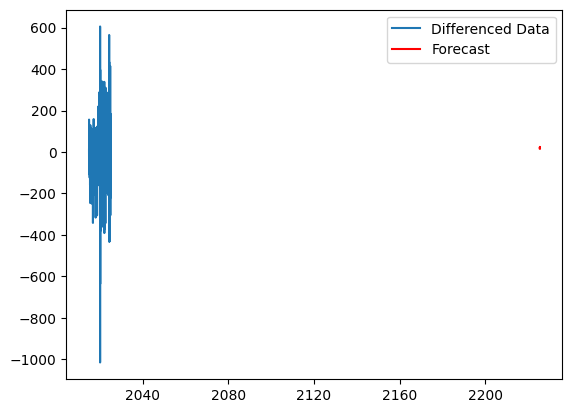

In [101]:

from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt


model = ARIMA(arf_resampled['Close_diff2'], order=(5,1,0))  
model_fit = model.fit()


print(model_fit.summary())


forecast = model_fit.forecast(steps=10)
print(f"Forecast: {forecast}")


plt.plot(arf_resampled['Close_diff2'], label='Differenced Data')
plt.plot(range(len(arf_resampled), len(arf_resampled) + 10), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

**Even Arima is failing**

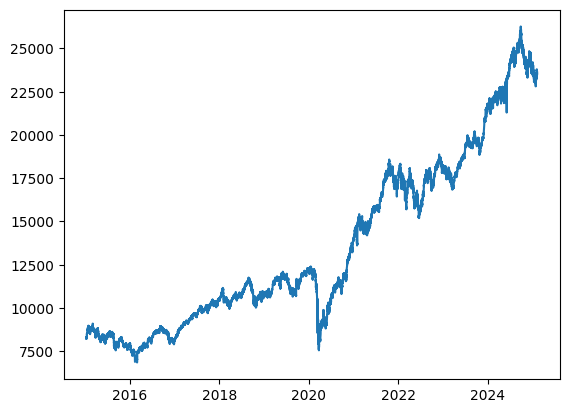

In [102]:
plt.plot(arf_resampled.index,arf_resampled['Close']);

**Vannila Machine Learning Ends here**

**Let's train LSTM Now**

In [103]:
af

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR,Close_1min
199,8212.55,8219.10,8202.10,8209.25,8231.955,8268.68550,8215.159813,8220.061019,-4.901206,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270,8209.20
200,8209.50,8211.95,8204.80,8209.20,8230.956,8268.27100,8214.242919,8219.256499,-5.013581,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822,8210.30
201,8209.65,8210.60,8203.75,8210.30,8229.988,8267.88175,8213.636316,8218.593055,-4.956739,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192,8209.10
202,8210.55,8212.05,8204.75,8209.10,8228.994,8267.45775,8212.938421,8217.889866,-4.951444,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107,8202.90
203,8209.15,8209.15,8201.00,8202.90,8227.870,8266.96900,8211.394049,8216.779505,-5.385457,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385,8204.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932941,23569.45,23570.60,23567.00,23568.10,23517.748,23538.81850,23568.547539,23553.432121,15.115418,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272,23567.40
932942,23568.10,23570.25,23565.30,23567.40,23519.506,23538.50500,23568.370995,23554.466779,13.904216,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609,23576.50
932943,23569.00,23578.35,23565.40,23576.50,23521.403,23538.27925,23569.621611,23556.098869,13.522741,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566,23568.10
932944,23577.05,23578.60,23567.45,23568.10,23523.186,23537.99775,23569.387517,23556.987842,12.399675,16.065169,-3.665494,57.757200,23.419412,23571.8250,23587.092859,23556.557141,9.405740,23563.15


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # We'll adapt this for time series later
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Ensure you have tensorflow installed: pip install tensorflow

2025-05-05 21:49:51.831376: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 21:49:51.953718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746461992.031124  560172 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746461992.048551  560172 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746461992.189632  560172 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [105]:
%pip install ta


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Importing necessary library and functions

In [106]:
import pandas as pd
import numpy as np
from datetime import datetime
from ta.volatility import BollingerBands
from ta.trend import SMAIndicator, EMAIndicator, ADXIndicator, MACD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

import matplotlib.pyplot as plt

def create_sequences(data, seq_len, label_index):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X_data = data.iloc[i:(i+seq_len)].values
        y_data = data.iloc[i+ seq_len][label_index]
        X.append(X_data)
        y.append(y_data)

    return np.array(X), np.array(y)

def add_technical_indicators(df, label_index):
    df['sma5'] = SMAIndicator(close=df[label_index], window=5).sma_indicator()
    df['sma10'] = SMAIndicator(close=df[label_index], window=10).sma_indicator()
    df['sma20'] = SMAIndicator(close=df[label_index], window=20).sma_indicator()

    df['ema_9'] = EMAIndicator(close=df[label_index], window=9).ema_indicator()
    df['ema_21'] = EMAIndicator(close=df[label_index], window=21).ema_indicator()

    macd = MACD(close=df[label_index])
    df['macd'] = macd.macd()
    df['macd_signal'] = macd.macd_signal()
    df['macd_diff'] = macd.macd_diff()

    bollinger = BollingerBands(close=df[label_index])
    df['bb_high'] = bollinger.bollinger_hband()
    df['bb_low'] = bollinger.bollinger_lband()
    df['bb_mid'] = bollinger.bollinger_mavg()
    df['bb_width'] = (df['bb_high'] - df['bb_low']) / df['bb_mid']

    return df

def draw_corr(df, y_index):
    corr_matrix = df.corr()

    print(corr_matrix[y_index])

def predict_next_price(df, model, seq_len, scaler, y_scaler):
    latest_data = df.iloc[-seq_len:].copy()

    X_new = latest_data.values.reshape(1, seq_len, latest_data.shape[1])
    X_new_reshaped = X_new.reshape(seq_len, latest_data.shape[1])
    X_new_scaled = scaler.transform(X_new_reshaped)
    X_new_scaled = X_new_scaled.reshape(1, seq_len, latest_data.shape[1])

    pred_scaled = model.predict(X_new_scaled)

    next_price = y_scaler.inverse_transform(pred_scaled)[0][0]

    return next_price

# Declaring required constants

In [107]:
SEQ_LEN = 5 # Number of days of sequence the ML model gets to look into
NEXT_PREDICTION_IN_MINUTES = 5
NUM_NEXT_PREDICTION_POINTS = 5

# Data Preprocessing

## Importing dataset

In [108]:
df = pd.read_csv('dataset_minute.csv')
df = df.drop(['Volume', 'High', 'Low', 'Open'], axis=1) # Useless, filled with 0s

df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

In [109]:
df.head()

,Close
Date,
2015-01-09 09:15:00,8292.10
2015-01-09 09:16:00,8288.15
2015-01-09 09:17:00,8293.90
2015-01-09 09:18:00,8300.65
2015-01-09 09:19:00,8301.20


In [110]:
df.describe()

,Close
count,932946.000000
mean,13623.752285
std,5047.831269
min,6848.100000
25%,9428.650000
50%,11561.450000
75%,17607.150000
max,26273.450000


## Adding technical indicators

In [111]:
df_processed = add_technical_indicators(df, 'Close')
df_processed = df_processed.dropna()

In [112]:
df_processed.head()

,Close,sma5,sma10,sma20,ema_9,ema_21,macd,macd_signal,macd_diff,bb_high,bb_low,bb_mid,bb_width
Date,,,,,,,,,,,,,
2015-01-09 09:48:00,8279.00,8281.46,8281.930,8284.0350,8281.466460,8284.302884,-3.025375,-2.925152,-0.100222,8292.235616,8275.834384,8284.0350,0.001980
2015-01-09 09:49:00,8283.75,8281.10,8281.960,8283.5150,8281.923168,8284.252622,-2.678561,-2.875834,0.197273,8290.276812,8276.753188,8283.5150,0.001633
2015-01-09 09:50:00,8275.55,8279.88,8281.020,8282.8050,8280.648534,8283.461474,-3.030447,-2.906757,-0.123691,8289.777725,8275.832275,8282.8050,0.001684
2015-01-09 09:51:00,8278.65,8279.22,8280.325,8282.2625,8280.248827,8283.024068,-3.024313,-2.930268,-0.094045,8288.737828,8275.787172,8282.2625,0.001564
2015-01-09 09:52:00,8279.05,8279.20,8280.215,8282.0600,8280.009062,8282.662789,-2.953133,-2.934841,-0.018292,8288.669811,8275.450189,8282.0600,0.001596


In [113]:
df_processed.describe()

,Close,sma5,sma10,sma20,ema_9,ema_21,macd,macd_signal,macd_diff,bb_high,bb_low,bb_mid,bb_width
count,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000,932913.000000
mean,13623.940990,13623.908218,13623.867251,13623.785306,13623.875445,13623.777230,0.114507,0.114430,0.000077,13639.586661,13607.983950,13623.785306,0.002391
std,5047.820829,5047.802317,5047.779827,5047.734928,5047.781003,5047.722798,7.641258,7.207313,2.270248,5052.168799,5043.366720,5047.734928,0.002955
min,6848.100000,6869.520000,6883.815000,6892.995000,6883.355593,6892.250103,-261.813155,-231.430459,-100.929147,6915.955028,6842.693025,6892.995000,0.000000
25%,9429.050000,9429.330000,9429.335000,9428.420000,9428.917170,9428.277414,-2.373479,-2.256049,-0.795753,9439.977451,9413.211292,9428.420000,0.001125
50%,11561.550000,11561.600000,11561.415000,11561.430000,11561.392260,11561.384423,0.228416,0.219897,-0.013993,11573.062773,11550.173700,11561.430000,0.001708
75%,17607.250000,17606.920000,17606.950000,17606.797500,17606.992034,17606.676224,2.741855,2.608470,0.759073,17628.410937,17586.318037,17606.797500,0.002713
max,26273.450000,26270.670000,26269.320000,26267.395000,26268.913730,26266.991832,181.208783,169.546054,75.572611,26283.346895,26261.433798,26267.395000,0.201521


## Checking correlation between indicators

In [114]:
draw_corr(df_processed, 'Close')

Close          1.000000
sma5           0.999999
sma10          0.999997
sma20          0.999995
ema_9          0.999998
ema_21         0.999996
macd           0.010908
macd_signal    0.011549
macd_diff      0.000050
bb_high        0.999987
bb_low         0.999989
bb_mid         0.999995
bb_width      -0.065328
Name: Close, dtype: float64


## Creating sequences and splitting in features

In [115]:
X, y = create_sequences(df_processed, SEQ_LEN, 'Close')

## Min Max scaling data

In [116]:
n_samples = X.shape[0]
n_steps = X.shape[1]
n_features = X.shape[2]

X_reshaped = X.reshape(n_samples * n_steps, n_features)

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X_reshaped)

X_scaled = X_scaled.reshape(n_samples, n_steps, n_features)

y_scaler = MinMaxScaler(feature_range=(0,1))
y_scaled = y_scaler.fit_transform(y.reshape(-1,1))

## Splitting into training and testing dataset

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, shuffle=False)

# Creating the models

## Creating RNN

In [118]:
rnn_model = Sequential([
    Input(shape=(n_steps, n_features)),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(128),
    Dropout(0.2),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

I0000 00:00:1746462077.344835  560172 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1832 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5, 128)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

## Creating LSTM

In [119]:
lstm_model = Sequential([
    Input(shape=(n_steps, n_features)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 128)         │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,417 (798.50 KB)

 Trainable params: 204,417 (798.50 KB)

 Non-trainable params: 0 (0.00 B)

## Creating GRU

In [120]:
gru_model = Sequential([
    Input(shape=(n_steps, n_features)),
    GRU(128, return_sequences=True),
    Dropout(0.2),
    GRU(128),
    Dropout(0.2),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')

gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 5, 128)         │        54,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,113 (602.00 KB)

 Trainable params: 154,113 (602.00 KB)

 Non-trainable params: 0 (0.00 B)

# Training the models on the dataset

Early stopping callback is used to save time. It also restores best weights depending on validation loss.

It has been set to start at epoch 5 to let the model get warmed up on the data.

## Training RNN

In [121]:
earlystopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, start_from_epoch=5)
rnn_history = rnn_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[earlystopping]
)

Epoch 1/100


I0000 00:00:1746462083.285018  560827 service.cc:152] XLA service 0x56518e5de9a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746462083.285047  560827 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-05-05 21:51:23.327261: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746462083.565587  560827 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-05 21:51:24.674367: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 48 bytes spill stores, 48 bytes spill loads



   37/23323 ━━━━━━━━━━━━━━━━━━━━ 1:39 4ms/step - loss: 0.3203 

I0000 00:00:1746462086.582938  560827 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23319/23323 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038

2025-05-05 21:53:23.528765: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 48 bytes spill stores, 48 bytes spill loads



23323/23323 ━━━━━━━━━━━━━━━━━━━━ 143s 6ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 2/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 157s 7ms/step - loss: 1.2297e-04 - val_loss: 0.0071
Epoch 3/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 172s 7ms/step - loss: 1.1308e-04 - val_loss: 0.0186
Epoch 4/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 172s 7ms/step - loss: 1.0660e-04 - val_loss: 0.0139
Epoch 5/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 175s 8ms/step - loss: 1.0556e-04 - val_loss: 0.0151
Epoch 6/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 131s 6ms/step - loss: 1.0485e-04 - val_loss: 0.0136
Epoch 7/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 129s 6ms/step - loss: 1.0308e-04 - val_loss: 0.0151
Epoch 8/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 130s 6ms/step - loss: 1.0305e-04 - val_loss: 0.0149
Epoch 9/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 136s 6ms/step - loss: 1.0263e-04 - val_loss: 0.0158
Epoch 10/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 126s 5ms/step - loss: 1.0302e-04 - val_loss: 0.0241
Epoch 11/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━

## Training LSTM

In [122]:
earlystopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, start_from_epoch=5)
lstm_history = lstm_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[earlystopping]
)

Epoch 1/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 214s 9ms/step - loss: 3.5768e-04 - val_loss: 0.0081
Epoch 2/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 213s 9ms/step - loss: 8.3578e-05 - val_loss: 0.0332
Epoch 3/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 214s 9ms/step - loss: 7.8273e-05 - val_loss: 0.0180
Epoch 4/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 207s 9ms/step - loss: 7.3676e-05 - val_loss: 0.0225
Epoch 5/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 209s 9ms/step - loss: 7.1127e-05 - val_loss: 0.0178
Epoch 6/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 210s 9ms/step - loss: 7.0865e-05 - val_loss: 0.0187
Epoch 7/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 214s 9ms/step - loss: 6.9451e-05 - val_loss: 0.0118
Epoch 8/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 214s 9ms/step - loss: 6.8786e-05 - val_loss: 0.0243
Epoch 9/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 218s 9ms/step - loss: 6.7793e-05 - val_loss: 0.0178
Epoch 10/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 215s 9ms/step - loss: 6.7514e-05 - val_loss: 0.0153
Epoch 11/100
23323/23323 ━━━━

## Training GRU

In [123]:
earlystopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, start_from_epoch=5)
gru_history = gru_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[earlystopping]
)

Epoch 1/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 200s 9ms/step - loss: 2.9082e-04 - val_loss: 0.0323
Epoch 2/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 199s 9ms/step - loss: 8.4502e-05 - val_loss: 0.0732
Epoch 3/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 201s 9ms/step - loss: 7.7961e-05 - val_loss: 0.0853
Epoch 4/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 203s 9ms/step - loss: 7.5253e-05 - val_loss: 0.0914
Epoch 5/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 205s 9ms/step - loss: 7.3163e-05 - val_loss: 0.0971
Epoch 6/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 206s 9ms/step - loss: 7.1448e-05 - val_loss: 0.0752
Epoch 7/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 208s 9ms/step - loss: 7.1555e-05 - val_loss: 0.0799
Epoch 8/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 210s 9ms/step - loss: 7.0093e-05 - val_loss: 0.0751
Epoch 9/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 212s 9ms/step - loss: 6.9557e-05 - val_loss: 0.0671
Epoch 10/100
23323/23323 ━━━━━━━━━━━━━━━━━━━━ 212s 9ms/step - loss: 6.9126e-05 - val_loss: 0.0556
Epoch 11/100
23323/23323 ━━━━

## Plotting Loss VS Epoch

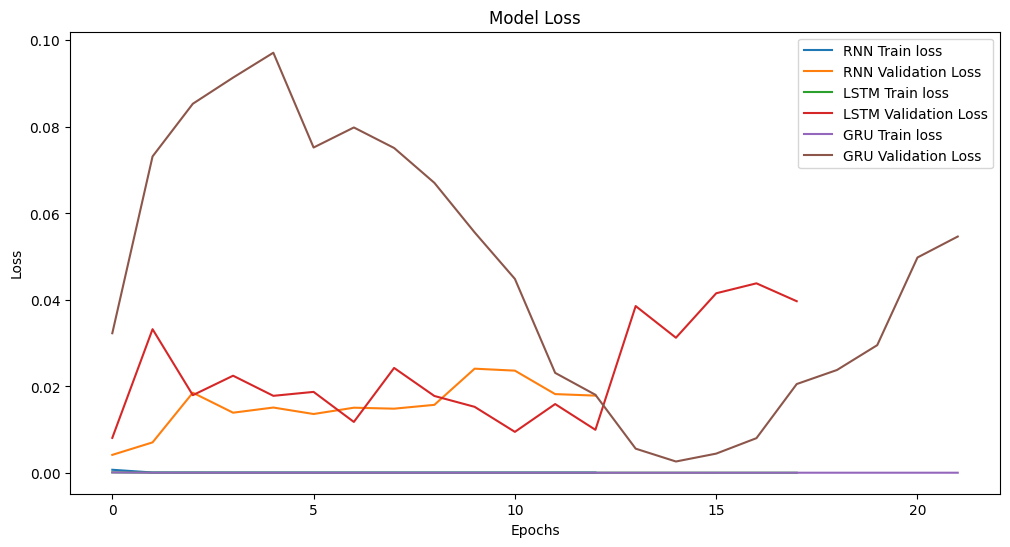

In [124]:
plt.figure(figsize=(12,6))
plt.plot(rnn_history.history['loss'], label='RNN Train loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Train loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Train loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting test data and getting metrics

## Predicting and unscaling data

In [125]:
rnn_y_pred_scaled = rnn_model.predict(X_test)
lstm_y_pred_scaled = lstm_model.predict(X_test)
gru_y_pred_scaled = gru_model.predict(X_test)

rnn_y_pred = y_scaler.inverse_transform(rnn_y_pred_scaled)
lstm_y_pred = y_scaler.inverse_transform(lstm_y_pred_scaled)
gru_y_pred = y_scaler.inverse_transform(gru_y_pred_scaled)

y_test_actual = y_scaler.inverse_transform(y_test)

5831/5831 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
5831/5831 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
5831/5831 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


## Getting RMSE, MAE and R2 score

In [126]:
rnn_rmse = math.sqrt(mean_squared_error(y_test_actual, rnn_y_pred))
lstm_rmse = math.sqrt(mean_squared_error(y_test_actual, lstm_y_pred))
gru_rmse = math.sqrt(mean_squared_error(y_test_actual, gru_y_pred))

print("Root Mean Squared Error: -")
print(f"RNN : {rnn_rmse}\nLSTM: {lstm_rmse}\nGRU: {gru_rmse}\n")

Root Mean Squared Error: -
RNN : 2268.32116373899
LSTM: 1894.0909839027572
GRU: 1001.6364022011013



In [127]:
rnn_mae = mean_absolute_error(y_test_actual, rnn_y_pred)
lstm_mae = mean_absolute_error(y_test_actual, lstm_y_pred)
gru_mae = mean_absolute_error(y_test_actual, gru_y_pred)

print("Mean Absolute Error: -")
print(f"RNN : {rnn_mae}\nLSTM: {lstm_mae}\nGRU: {gru_mae}\n")

Mean Absolute Error: -
RNN : 1695.6703211444064
LSTM: 1468.9393373833288
GRU: 615.3137756413737



In [128]:
rnn_r2 = r2_score(y_test_actual, rnn_y_pred)
lstm_r2 = r2_score(y_test_actual, lstm_y_pred)
gru_r2 = r2_score(y_test_actual, gru_y_pred)

print("R2 Score: -")
print(f"RNN : {rnn_r2}\nLSTM: {lstm_r2}\nGRU: {gru_r2}\n")

R2 Score: -
RNN : 0.18719028457013376
LSTM: 0.43326312651660415
GRU: 0.841510682361259



# Plotting Actual and Predicted price

## Only RNN

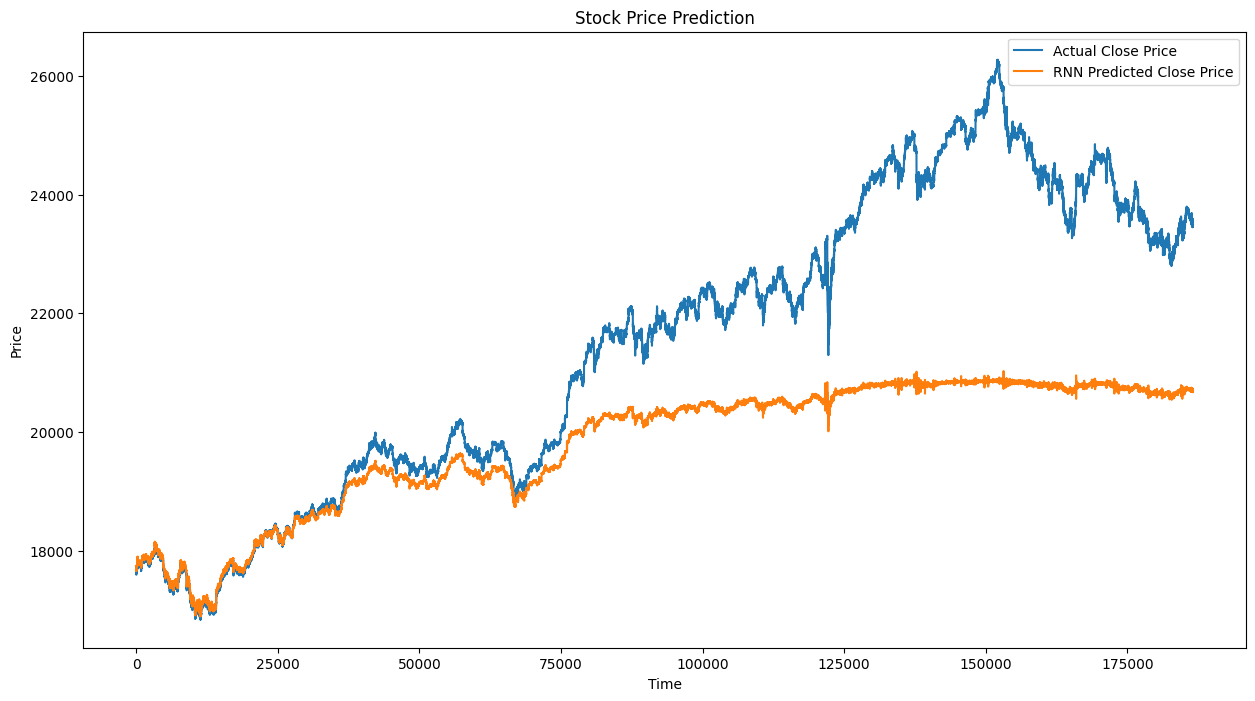

In [129]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_actual, label='Actual Close Price')
plt.plot(rnn_y_pred, label='RNN Predicted Close Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Only LSTM

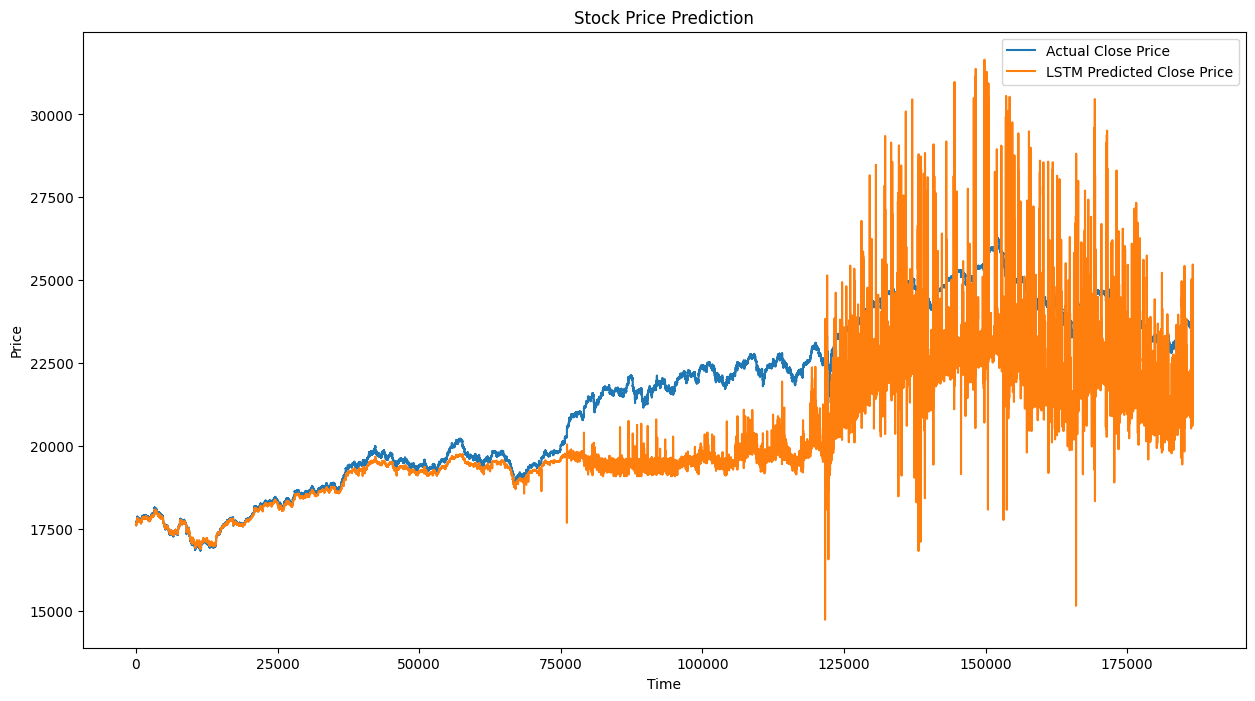

In [130]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_actual, label='Actual Close Price')
plt.plot(lstm_y_pred, label='LSTM Predicted Close Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Only GRU

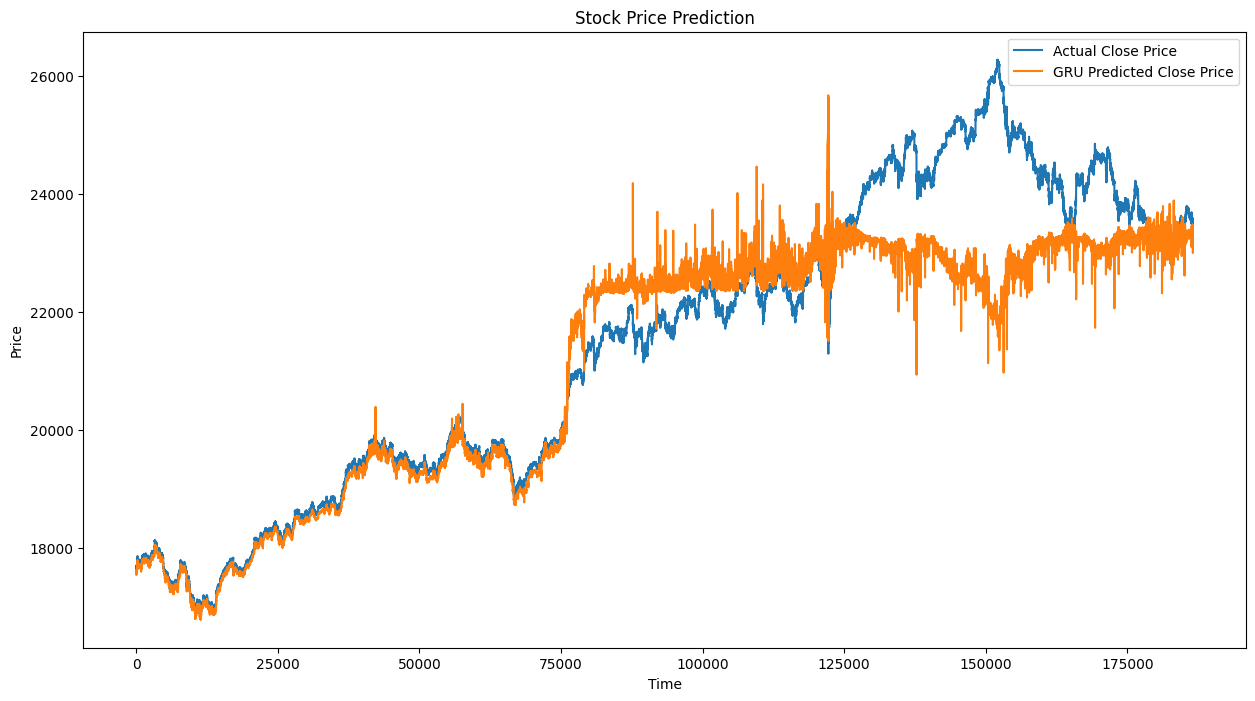

In [131]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_actual, label='Actual Close Price')
plt.plot(gru_y_pred, label='GRU Predicted Close Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## All 3 models together

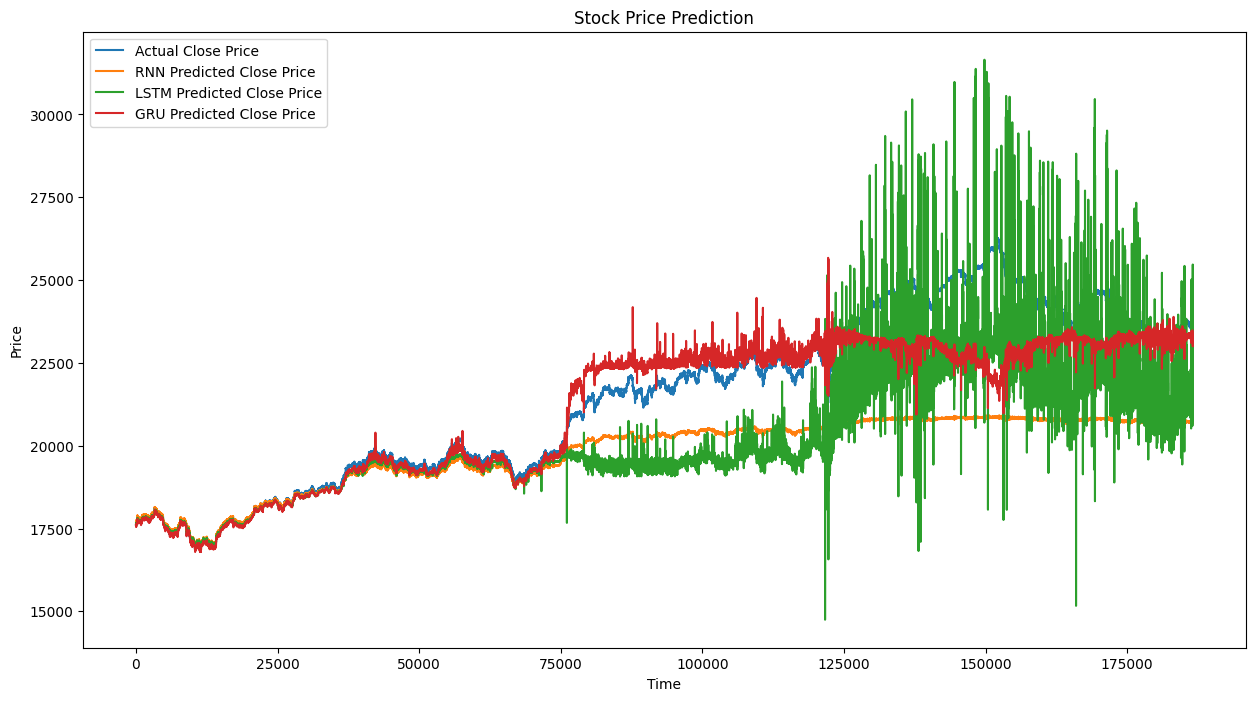

In [132]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_actual, label='Actual Close Price')
plt.plot(rnn_y_pred, label='RNN Predicted Close Price')
plt.plot(lstm_y_pred, label='LSTM Predicted Close Price')
plt.plot(gru_y_pred, label='GRU Predicted Close Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()